<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Чтение-файлов-и-проверка,-что-эффективность-обогащения-'rougher.output.recovery'-рассчитана-правильно." data-toc-modified-id="Чтение-файлов-и-проверка,-что-эффективность-обогащения-'rougher.output.recovery'-рассчитана-правильно.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Чтение файлов и проверка, что эффективность обогащения 'rougher.output.recovery' рассчитана правильно.</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке." data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Как-меняется-концентрация-металлов-(Au---золота,-Ag---серебро,-Pb---палладий)-на-различных-этапах-очистки" data-toc-modified-id="Как-меняется-концентрация-металлов-(Au---золота,-Ag---серебро,-Pb---палладий)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Как меняется концентрация металлов (Au - золота, Ag - серебро, Pb - палладий) на различных этапах очистки</a></span></li><li><span><a href="#Сравните-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Сравните-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравните распределения размеров гранул сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Исследование-суммарных-концентраций" data-toc-modified-id="Исследование-суммарных-концентраций-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарных концентраций</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишите-функцию-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Напишите-функцию-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишите функцию для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучите-разные-модели-и-оцените-их-качество-кросс-валидацией.-Выберите-лучшую-модель-и-проверьте-её-на-тестовой-выборке.-Опишите-выводы." data-toc-modified-id="Обучите-разные-модели-и-оцените-их-качество-кросс-валидацией.-Выберите-лучшую-модель-и-проверьте-её-на-тестовой-выборке.-Опишите-выводы.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from matplotlib import cm
import seaborn as sns
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import KFold

### Чтение файлов и проверка, что эффективность обогащения 'rougher.output.recovery' рассчитана правильно. 

Прочитаем файлы.

In [2]:
start_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')                  
start_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')                    
start_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')                    

Посмотрим есть ли пропущенные значения.

In [3]:
start_train['rougher.output.recovery'].isnull().sum()                               

0

По условиям задания recovery вычисляется по формуле:
    recovery = ((С*(F-T)) / (F*(C-T))) * 100 %
    
где:
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

Aurum на латинском языке золото.

В нешей таблице им соответствуют следующие столбцы:
- C - rougher.output.concentrate_au;                  
- F - rougher.input.feed_au;
- T - rougher.output.tail_au.


In [4]:
C = start_train['rougher.output.concentrate_au']
F = start_train['rougher.input.feed_au']
T = start_train['rougher.output.tail_au']

In [5]:
recovery = ((C * (F-T)) / (F * (C-T))) * 100

Посмотрим полученные значения.

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64


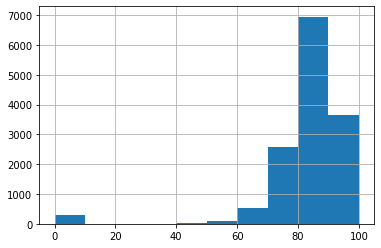

In [6]:
print(recovery.head(5))                                
plt.figure()
recovery.hist();

Посмотрим значения которые уже были в файле.

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64


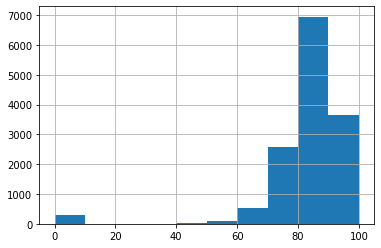

In [7]:
print(start_train['rougher.output.recovery'].head(5))  
plt.figure()
start_train['rougher.output.recovery'].hist();

In [8]:
print("Средняя абсолютная ошибка (MAE):", mean_absolute_error(recovery, start_train['rougher.output.recovery']))

Средняя абсолютная ошибка (MAE): 9.682896147825551e-15


Проведенный расчет средней абсолютной ошибки (MAE) показал, что значения recovery и  start_train['rougher.output.recovery'] очень близки.

### Анализ признаков, недоступных в тестовой выборке.

Посмотрим размеры выборок

In [9]:
print(start_train.shape)
print(start_test.shape)

(14149, 87)
(5290, 53)


Видим, что они сильно, на 34 столбца, отличаются. Посмотрим, что это за столбцы.

In [10]:
diff_columns = start_train.columns.drop(start_test.columns)
start_train[diff_columns].head()                                        # столбцы, отсутствующие в тестовой выборке

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.output.concentrate_ag,...,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,8.547551,...,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,14.500184,4.694824,8.764648,2.606185
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,8.558743,...,20.050975,86.843261,4.955378,0.536689,18.965234,1.184827,14.265474,4.592547,9.001494,2.488248
2,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,8.603505,...,19.737170,86.842308,4.843460,0.546416,18.808533,1.162562,14.115662,4.624775,8.842896,2.458187
3,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,7.221879,...,19.320810,87.226430,4.655288,0.542525,19.330200,1.079755,13.732071,4.482453,9.122857,2.322062
4,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,9.089428,...,19.216101,86.688794,4.552800,0.515438,19.267422,1.012642,14.079996,4.470737,8.871028,2.330448


Видим, что отсутствующие столбцы это показатели содержания металлов после процессов. Удалим их и проверим, что бы в обоих выборках были необходимые нам эффективность обогащения чернового концентрата "rougher.output.recovery" и эффективность обогащения финального концентрата "final.output.recovery"

In [11]:
drop_to_columns = diff_columns.drop(['final.output.recovery', 'rougher.output.recovery'])
columns = start_train.columns.drop(drop_to_columns)
start_train = start_train[columns]

Проверим как готовы столбцы, нет ли 'final.output.recovery' и 'rougher.output.recovery'.

In [12]:
display(drop_to_columns)

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol',
       'final.output.tail_au', 'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.output.tail_ag',
       'rougher.outp

Объединим start_test с start_full (полной выборкой) по целевым столбцам.

In [13]:
targets_to_join = start_full[['date', 'final.output.recovery', 'rougher.output.recovery']].copy()
start_test_full = start_test.join(targets_to_join.set_index('date'), on='date')

Проверяем есть ли столбцы 'final.output.recovery' и 'rougher.output.recovery'. Столбцы есть, последние в списке.

In [14]:
start_test_full.columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

Проверем есть ли столбцы 'final.output.recovery' и 'rougher.output.recovery'. Столбцы есть.

In [15]:
start_train.columns

Index(['date', 'final.output.recovery', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.recovery',
       'rougher.state.floatbank10_

In [16]:
print(start_train.shape)
print(start_test_full.shape)

(14149, 55)
(5290, 55)


In [17]:
start_train.dropna(subset = ['final.output.recovery', 'rougher.output.recovery'], inplace = True)
start_test_full.dropna(subset = ['final.output.recovery', 'rougher.output.recovery'], inplace = True) 
start_test = start_test_full.copy()

In [18]:
print(start_train.shape)
print(start_test.shape)

(14149, 55)
(5290, 55)


In [19]:
start_test 

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,70.273583,89.993421
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,68.910432,88.089657
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,68.143213,88.412756
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,67.776393,87.360133
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,61.467078,83.236367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909,68.919891,95.172585
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761,68.440582,94.575036
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882,67.092759,93.018138
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284,68.061186,92.599042


### Предобработка данных

Подготовим функцию для:
- получения информации про файл,
- отображения содержимого файла,
- отображения наименования столбцов,
- отображения наличия дубликатов.

In [20]:
def inform (start_x):                                                # введем функцию для получения информации из файла
    start_x.info()                                                   # общая информация про файл
    display(start_x.head(5))                                         # смотрим содержание файла
    print("Наименование столбцов:", start_x.columns)                 # смотрим наименование столбцов
    print()
    print("Количество дубликатов: ", start_x.duplicated().sum())     # смотрим, есть ли дубликаты 

In [21]:
inform (start_train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14149 entries, 0 to 14148
Data columns (total 55 columns):
date                                          14149 non-null object
final.output.recovery                         14149 non-null float64
primary_cleaner.input.sulfate                 14129 non-null float64
primary_cleaner.input.depressant              14117 non-null float64
primary_cleaner.input.feed_size               14149 non-null float64
primary_cleaner.input.xanthate                14049 non-null float64
primary_cleaner.state.floatbank8_a_air        14145 non-null float64
primary_cleaner.state.floatbank8_a_level      14148 non-null float64
primary_cleaner.state.floatbank8_b_air        14145 non-null float64
primary_cleaner.state.floatbank8_b_level      14148 non-null float64
primary_cleaner.state.floatbank8_c_air        14147 non-null float64
primary_cleaner.state.floatbank8_c_level      14148 non-null float64
primary_cleaner.state.floatbank8_d_air        14146 non-null flo

,date,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,70.541216,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,69.266198,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,68.116445,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,68.347543,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,66.927016,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Наименование столбцов: Index(['date', 'final.output.recovery', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.recovery',
       'rou

Посмотрим процентное соотношение пропущенных значений

In [22]:
pd.DataFrame(start_train.isna().mean().round(4)*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm') 

,0
rougher.state.floatbank10_e_air,3.08
rougher.input.floatbank11_xanthate,3.02
secondary_cleaner.state.floatbank2_a_air,1.53
rougher.input.feed_size,1.02
primary_cleaner.input.xanthate,0.71
rougher.input.feed_pb,0.71
rougher.input.feed_sol,0.55
rougher.input.floatbank11_sulfate,0.25
primary_cleaner.input.depressant,0.23
rougher.input.floatbank10_sulfate,0.2


In [23]:
inform (start_test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 55 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,70.273583,89.993421
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,68.910432,88.089657
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,68.143213,88.412756
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,67.776393,87.360133
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,61.467078,83.236367


Наименование столбцов: Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatb

Посмотрим процентное соотношение пропущенных значений

In [24]:
pd.DataFrame(start_test.isna().mean().round(4)*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm')

,0
rougher.input.floatbank11_xanthate,0.47
rougher.input.feed_sol,0.4
secondary_cleaner.state.floatbank3_a_air,0.17
rougher.input.floatbank11_sulfate,0.15
primary_cleaner.input.depressant,0.09
rougher.input.floatbank10_sulfate,0.09
primary_cleaner.input.sulfate,0.08
primary_cleaner.input.xanthate,0.08
secondary_cleaner.state.floatbank2_a_air,0.06
rougher.input.feed_rate,0.06


In [25]:
print(start_train.shape)
print(start_test.shape)

(14149, 55)
(5290, 55)


Чтобы не удалять пропущенные значения и зная, что соседние значения близки, применим функцию Pandas dataframe.ffill() для заполнения отсутствующего значения. «ffill» означает «прямое заполнение» и будет распространять последнее действительное наблюдение вперед.

In [26]:
start_train = start_train.fillna(method='ffill')
start_test = start_test.fillna(method='ffill')

Вывод: прочитали файлы, проверили правильно ли расчитано rougher.output.recovery, привели выборки к одинаковому размеру - 55 столбцов, заполнили пропуски применив dataframe.ffill().

## Анализ данных

### Как меняется концентрация металлов (Au - золота, Ag - серебро, Pb - палладий) на различных этапах очистки  

По описанию технологического процесса знаем, что есть три этапа очистки: флотация, первичный и второй этап очистки, также посмотрим концентрацию на выходе.

- rougher.input.feed_X                    флотация/параметры сырья/
- rougher.output.concentrate_X            флотация/параметры продукта/
- primary_cleaner.output.concentrate_X    
- final.output.concentrate_X

In [27]:
au_data = (start_full[['rougher.input.feed_au', 'rougher.output.concentrate_au',
                       'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']])

Text(0.5, 1.0, 'Концентрация золота после этапов')

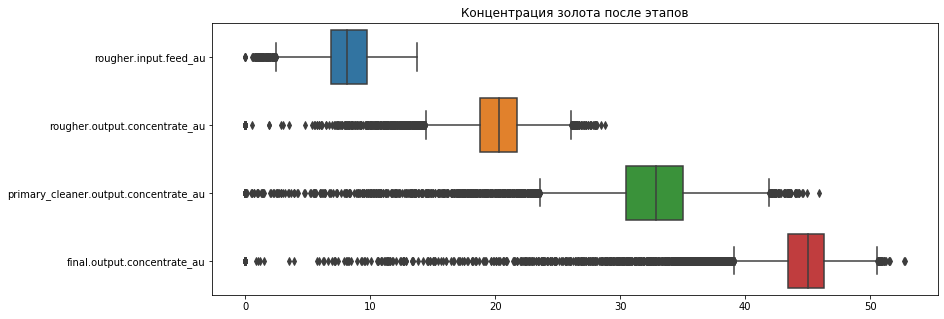

In [28]:
plt.figure(figsize=(13,5))
sns.boxplot(data = au_data, orient = 'h').set_title('Концентрация золота после этапов')

Text(0.5, 1.0, 'Концентрация серебра после этапов')

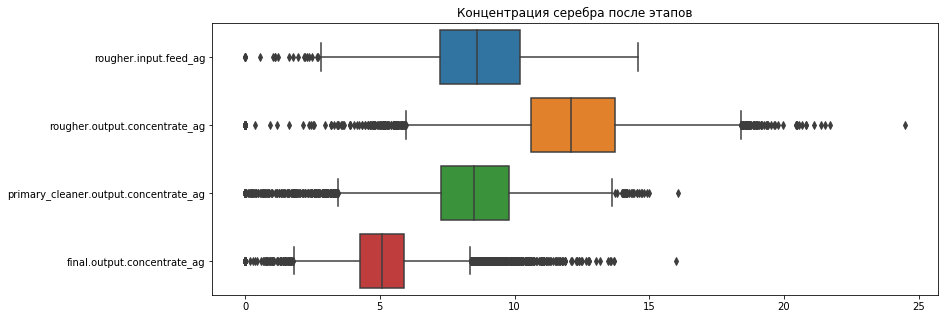

In [29]:
ag_data = (start_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag',
                       'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']])
plt.figure(figsize=(13,5))
sns.boxplot(data = ag_data, orient = 'h').set_title('Концентрация серебра после этапов')

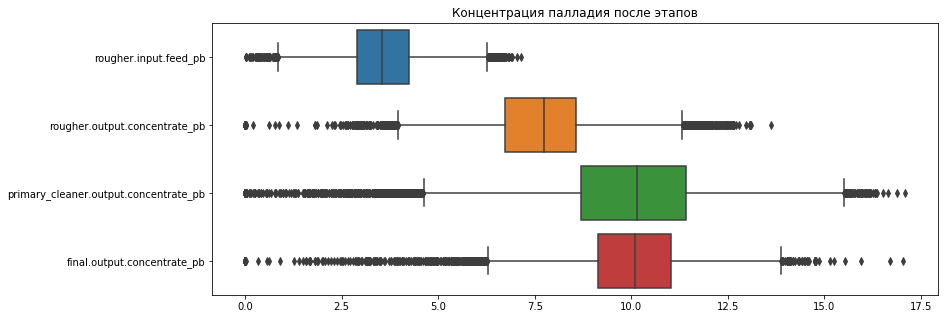

In [30]:
pb_data = (start_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb',
                       'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']])
plt.figure(figsize=(13,5))
sns.boxplot(data = pb_data, orient = 'h').set_title('Концентрация палладия после этапов');

Вывод: по графикам четко видим, что концентрация золото от этапа к этапу увеличивается. Концентрация серебра уменьшается после втого этапа и финальная концентрация меньше начальной. Концентрация палладия растет на трех этапах, на финальном этапе концентрация не меняется.

### Сравните распределения размеров гранул сырья на обучающей и тестовой выборках.

feed_size - размер гранул сырья. Этот параметр есть в rougher.input.feed_size и primary_cleaner.input.feed_size.

Распределения размеров гранул сырья на обучающей выборке: 60.23985599255732
Распределения размеров гранул сырья на тестовой выборке 55.95275402889513


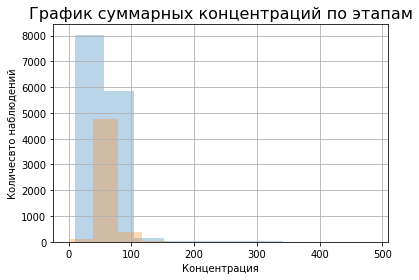

In [31]:
print("Распределения размеров гранул сырья на обучающей выборке:", start_train['rougher.input.feed_size'].mean())
print('Распределения размеров гранул сырья на тестовой выборке', start_test['rougher.input.feed_size'].mean())
start_train['rougher.input.feed_size'].hist(alpha=.3)
start_test_full['rougher.input.feed_size'].hist(alpha=.3);

plt.title('График суммарных концентраций по этапам', size=16);
plt.xlabel('Концентрация')
plt.ylabel('Количесвто наблюдений');

Распределения размеров гранул сырья на обучающей выборке: 7.322309906901314
Распределения размеров гранул сырья на тестовой выборке 7.266339191270906


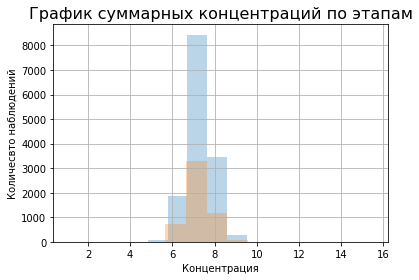

In [32]:
print("Распределения размеров гранул сырья на обучающей выборке:", start_train['primary_cleaner.input.feed_size'].mean())
print('Распределения размеров гранул сырья на тестовой выборке', start_test['primary_cleaner.input.feed_size'].mean())
start_train['primary_cleaner.input.feed_size'].hist(alpha=.3)
start_test_full['primary_cleaner.input.feed_size'].hist(alpha=.3);

plt.title('График суммарных концентраций по этапам', size=16);
plt.xlabel('Концентрация')
plt.ylabel('Количесвто наблюдений');

Вывод: концентрация на rougher.input.feed_size
- 60.24 распределения размеров гранул сырья на обучающей выборке 
- 55.95 распределения размеров гранул сырья на тестовой выборке, 

в то время как после primary_cleaner.input.feed_size размеры практически сравнялись
- 7.32 распределения размеров гранул сырья на обучающей выборке
- 7.26 распределения размеров гранул сырья на тестовой выборке. 

### Исследование суммарных концентраций

Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [33]:
start_full['rougher_feed_sum'] = start_full[['rougher.input.feed_ag',
                                             'rougher.input.feed_au','rougher.input.feed_pb',
                                             'rougher.input.feed_sol']].sum(axis = 1)

In [34]:
start_full['rougher_output_sum'] = start_full[['rougher.output.concentrate_ag',
                                               'rougher.output.concentrate_au', 'rougher.output.concentrate_pb',
                                               'rougher.output.concentrate_sol']].sum(axis = 1)

In [35]:
start_full['primary_sum'] = start_full[['primary_cleaner.output.concentrate_ag',
                                        'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_au',
                                        'primary_cleaner.output.concentrate_sol']].sum(axis = 1)

In [36]:
start_full['final_sum'] = start_full[['final.output.concentrate_ag', 'final.output.concentrate_pb',
                                      'final.output.concentrate_au', 'final.output.concentrate_sol']].sum(axis = 1)

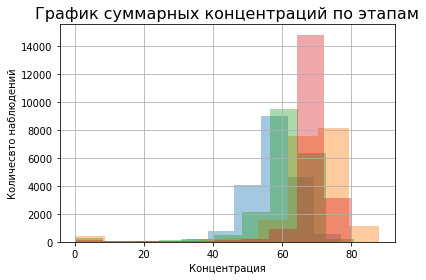

In [37]:
start_full['rougher_feed_sum'].hist(alpha=.4)               # синий цвет
start_full['rougher_output_sum'].hist(alpha=.4)             # оранжевый цвет
start_full['primary_sum'].hist(alpha=.4)                    # зеленый цвет
start_full['final_sum'].hist(alpha=.4)                      # красный цвет

plt.title('График суммарных концентраций по этапам', size=16);
plt.xlabel('Концентрация')
plt.ylabel('Количесвто наблюдений');

По грифику видим, что есть аномальные значения от 0 до 20. Удалим их.

In [38]:
start_full=start_full.loc[(start_full['rougher_feed_sum']>20) & (start_full['rougher_output_sum']>20) & (start_full['primary_sum']>20) & (start_full['final_sum']>20)] 

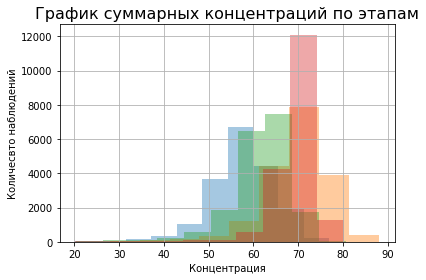

In [39]:
start_full['rougher_feed_sum'].hist(alpha=.4)               # синий цвет
start_full['rougher_output_sum'].hist(alpha=.4)             # оранжевый цвет
start_full['primary_sum'].hist(alpha=.4)                    # зеленый цвет
start_full['final_sum'].hist(alpha=.4)                      # красный цвет

plt.title('График суммарных концентраций по этапам', size=16);
plt.xlabel('Концентрация')
plt.ylabel('Количесвто наблюдений');

Вывод: по графикам видим, что от этапа к этапу концентрация увеличивается.

## Модель

### Напишите функцию для вычисления итоговой sMAPE

Симметричная средняя абсолютная процентная ошибка (SMAPE) используется для измерения интеллектуальной точности моделей.

In [40]:
def to_smape (target, predictions):
    return 100/len(target) * np.sum(2 * np.abs(predictions - target) / (np.abs(target) + np.abs(predictions)))

In [41]:
def to_itog_smape (rougher, final):
    return 0.25 * rougher + 0.75 * final

### Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

Подготовим признаки

In [42]:
target_rougher = start_train['rougher.output.recovery']
target_final = start_train['final.output.recovery']

features_train = start_train.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis='columns')

In [43]:
target_rougher_test = start_test['rougher.output.recovery']
target_final_test = start_test['final.output.recovery']

features_test = start_test.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis='columns')

Масштабируем признаки

In [44]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)

In [45]:
scaler = StandardScaler()
scaler.fit(features_test)
features_test = scaler.transform(features_test)

Рассмотрим DecisionTreeRegressor

In [46]:
my_scorer = make_scorer(to_smape, greater_is_better=False)

In [47]:
model_dtr = DecisionTreeRegressor(random_state=12345)
results = cross_val_score(model_dtr, features_train, target_rougher, scoring=my_scorer, cv=5).mean()
print("Results:", results)

Results: -25.896898844536985


Рассмотрим LinearRegression

In [48]:
model_lr = LinearRegression()
results = cross_val_score(model_lr, features_train, target_rougher, scoring=my_scorer, cv=5).mean()
print("Results:", results)

Results: -12.80248345848199


Рассотрим RandomForestRegressor

In [49]:
model_rf = RandomForestRegressor(max_depth = 3, n_estimators = 17, random_state = 12345)
model_dtr = DecisionTreeRegressor(random_state=12345)
results = cross_val_score(model_rf, features_train, target_rougher, scoring=my_scorer, cv=5).mean()
print("Results:", results)

Results: -11.404657476055112


Лучшее значение у RandomForestRegressor. Проверим ее на тестовой выборке.

In [50]:
model_rfr_n1 = RandomForestRegressor(max_depth = 3, n_estimators = 17, random_state = 12345)
model_rfr_n2 = RandomForestRegressor(max_depth = 3, n_estimators = 17, random_state = 12345)

rfr_rougher = model_rfr_n1.fit(features_train, target_rougher)
rfr_final = model_rfr_n2.fit(features_train, target_final)

rfr_predictions_rougher = rfr_rougher.predict(features_test)
rfr_predictions_final = rfr_final.predict(features_test)

Посчитаем sMAPE для обоих признаков и итоговый

In [51]:
smape_rougher = to_smape(target_rougher_test, rfr_predictions_rougher)
smape_final = to_smape(target_final_test, rfr_predictions_final)
to_itog_smape(smape_rougher, smape_final)

9.92951165273915

Сравним с DummyRegressor.

In [52]:
dummy = DummyRegressor(strategy = 'median')
dummy_1 = DummyRegressor(strategy = 'median')

dummy_rougher = dummy.fit(features_train, target_rougher)
dummy_predictions_rougher = dummy_rougher.predict(features_test)

dummy_final = dummy_1.fit(features_train, target_final)
dummy_predictions_final = dummy_final.predict(features_test)
smape_rougher_dummy = to_smape(target_rougher_test, dummy_predictions_rougher)
smape_final_dummy = to_smape(target_final_test, dummy_predictions_final)
to_itog_smape(smape_rougher_dummy, smape_final_dummy)

9.479919198122861

Вывод: написали функцию для вычисления итоговой sMAPE. 
Рассмотрели три модели:
- DecisionTreeRegressor
- LinearRegression
- RandomForestRegressor.

Выяснили, что лучше всего показатели у RandomForestRegressor. 

Посчитали его итоговый sMAPE 9.92951165273915 (12.366776543870039 до правок), итоговый sMAPE на DummyRegressor получился 9.479919198122861 (11.350420514472075 до правок).

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке